In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from phase_response import *


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import LSQUnivariateSpline

In [2]:
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
    'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}

RS_E = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
    'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.03, 'f': 8.0, 'tau': 0.5}

T_pert = 0.01 #ms, duration of perturbation
H_pert = 100 # pA, amplitude of perturbation
#pert = 100*np.ones(10) 

I_heights = [100, 150, 200, 250, 300, 400, 500, 600]


In [3]:
df1 = pd.DataFrame(data = [], columns = ["I_h", "Hz", "Perturbation time", "PRC"])
df2 = pd.DataFrame(data = [], columns = ["I_h", "Hz", "Perturbation time", "PRC"])

for I_h in I_heights:
    df1 = pd.concat([df1, phase_response(RS, I_h, T_pert, H_pert)], ignore_index = True)
    df2 = pd.concat([df2, phase_response(RS_E, I_h, T_pert, H_pert)], ignore_index = True)

A perturbation of height 100 pA and duration 0.01 ms


100%|██████████| 399999/399999 [00:04<00:00, 85088.25it/s]


Number of spikes: 26
duration: 30415
t_i: 663.535
t_f: 739.57
Number of perturbations: 500
Reference spiking period is 76.04 ms (13.0 Hz)
N_sims: 1


 44%|████▍     | 13533/30414 [00:27<00:34, 495.17it/s]


KeyboardInterrupt: 

In [ ]:
# SAVE
#df1.to_csv('PRC_RS_noautapse.csv')
#df2.to_csv('PRC_RS_autapse.csv')

# IMPORT
#df1 = pd.read_csv('PRC_RS_noautapse.csv')
#df2 = pd.read_csv('PRC_RS_autapse.csv')

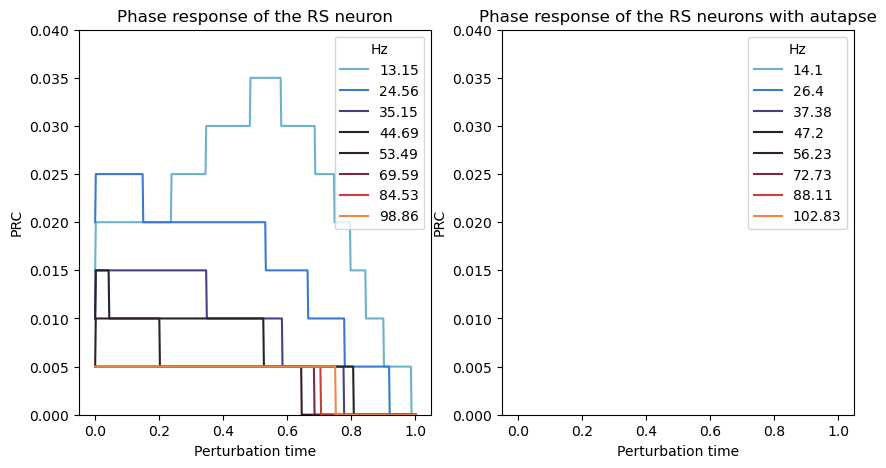

In [ ]:
df1["Hz"] = df1["Hz"].astype('category')
df2["Hz"] = df2["Hz"].astype('category')

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.lineplot(data = df1, x = "Perturbation time", y = "PRC", hue = "Hz", ax = ax[0], palette = "icefire")
sns.lineplot(data = df2, x = "Perturbation time", y = "PRC", hue = "Hz", ax = ax[1], palette = "icefire")
ax[0].set_title("Phase response of the RS neuron")
ax[1].set_title("Phase response of the RS neurons with autapse")
ax[0].set(ylim = (-0.04, 0.04))
ax[1].set(ylim = (-0.04, 0.04))
#plt.savefig("PRC_aut_v_none.png")
plt.show()

df1["Hz"] = df1["Hz"].astype('float')
df2["Hz"] = df2["Hz"].astype('float')


11.170000051887882
7.600000027761098
4.2650000194081485
3.435000015259334
2.1100000127452176
1.7100000097897237
1.760000008055954
1.8750000068834538


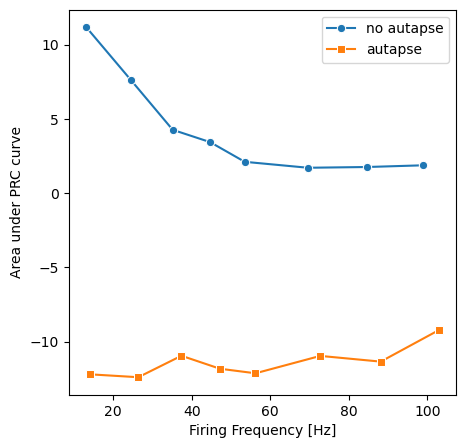

In [ ]:
# plot the area under the phase response curve.
Hz_none = df1["Hz"].unique()
Hz_aut = df2["Hz"].unique()

A_none = np.zeros(len(Hz_none))
A_aut = np.zeros(len(Hz_aut))

for n, I in enumerate(I_heights):
    print(np.sum(df1[df1["I_h"] == I]["PRC"]))
    A_none[n] = np.sum(df1[df1["I_h"] == I]["PRC"])
    A_aut[n] = np.sum(df2[df2["I_h"] == I]["PRC"])

fig, ax = plt.subplots(figsize = (5, 5))
sns.lineplot(x = Hz_none, y = A_none, marker = 'o', label = "no autapse", ax = ax)
sns.lineplot(x = Hz_aut, y = A_aut, marker = 's', label = "autapse", ax = ax)
ax.set(xlabel = "Firing Frequency [Hz]", ylabel = "Area under PRC curve")
#plt.savefig("area_under_PRC.png")
plt.show()


11.170000051887882
7.600000027761098
4.2650000194081485
3.435000015259334
2.1100000127452176
1.7100000097897237
1.760000008055954
1.8750000068834538


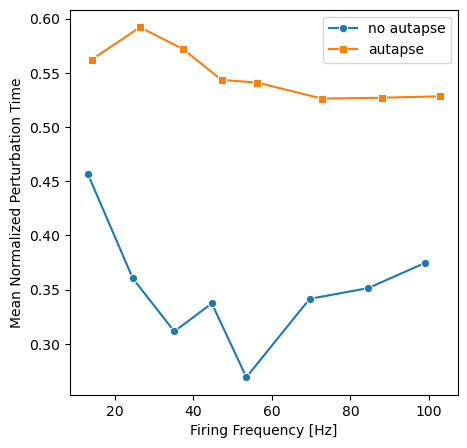

In [ ]:
# plot the mean delay time.
Hz_none = df1["Hz"].unique()
Hz_aut = df2["Hz"].unique()

Mean_none = np.zeros(len(Hz_none))
Mean_aut = np.zeros(len(Hz_aut))

for n, I in enumerate(I_heights):
    print(np.sum(df1[df1["I_h"] == I]["PRC"]))
    Mean_none[n] = np.average(df1[df1["I_h"] == I]["Perturbation time"], weights = df1[df1["I_h"] == I]["PRC"])
    Mean_aut[n] = np.average(df2[df2["I_h"] == I]["Perturbation time"], weights = df2[df2["I_h"] == I]["PRC"])

fig, ax = plt.subplots(figsize = (5, 5))
sns.lineplot(x = Hz_none, y = Mean_none, marker = 'o', label = "no autapse", ax = ax)
sns.lineplot(x = Hz_aut, y = Mean_aut, marker = 's', label = "autapse", ax = ax)
ax.set(xlabel = "Firing Frequency [Hz]", ylabel = "Mean Normalized Perturbation Time")
#plt.savefig("mean_pert_time.png")
plt.show()

In [ ]:
print(df2.head())

     I_h    Hz  Perturbation time    PRC
0  100.0  14.1           0.000000 -0.045
1  100.0  14.1           0.001973 -0.025
2  100.0  14.1           0.003947 -0.025
3  100.0  14.1           0.005991 -0.025
4  100.0  14.1           0.007964 -0.025
